<a href="https://colab.research.google.com/github/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/blob/main/EDA_team_blancpainTwitts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DMML TEAM BLANCPAIN



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

##**Data Importation and visualization**

### **Load Data**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/training_data.csv')

df_test = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/test_data.csv')

df_sample = pd.read_csv('https://raw.githubusercontent.com/sfrancey/Real-or-Not-NLP-with-Disaster-Tweets_Team_Blancpain/main/Data/sample_submission.csv')

Train Model 

In [3]:
df_train.head(10)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [4]:
print("There are {0} rows and {1} columns in the train dataset.".format(df_train.shape[0],df_train.shape[1]))


There are 6471 rows and 5 columns in the train dataset.


Test Model

In [5]:
df_test.head(10)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
5,10020,twister,NaN,Brain twister let drop up telly structuring ca...
6,8676,sinkhole,"San Diego, CA",RT twit_san_diego 'Possible sinkhole disrupts ...
7,3131,debris,NaN,Aircraft debris found on island is from MH370 ...
8,2195,catastrophic,"Dublin, Ireland",'Kessler Syndrome' is the name for the catastr...
9,3484,derailed,DC,So a train derailed and instead of me getting ...


In [6]:
print("There are {0} rows and {1} columns in the test dataset.".format(df_test.shape[0],df_test.shape[1]))


There are 1142 rows and 4 columns in the test dataset.


### Missing values:

In [45]:
missingTrain = df_train.isnull().sum(axis = 0)
print(missingTrain)
#missing_train.plot.bar(x='lab', y='val', rot=0, color='plum', title='Missing Values in Train set')

id             0
keyword       55
location    2141
text           0
target         0
dtype: int64


In [46]:
missingTest = df_test.isnull().sum(axis = 0)
print(missingTest)
#missing_test.plot.bar(x='lab', y='val', rot=0, color='lightblue', title='Missing Values in Test set')

id            0
keyword       6
location    392
text          0
dtype: int64


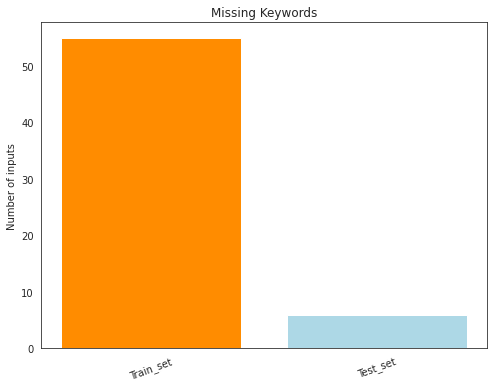

In [60]:
missingKeywordsTrain = df_train.keyword.isnull().sum(axis = 0)
missingKeywordsTest = df_test.keyword.isnull().sum(axis = 0)

#plot NaN proportion for Keyword
plt.rcParams['figure.figsize'] = (8, 6)
x = np.arange(2)
plt.bar(x,[missingKeywordsTrain, missingKeywordsTest], color=['darkorange','lightblue'])
plt.ylabel('Number of inputs')
plt.title('Missing Keywords')
plt.xticks(x, ('Train_set', 'Test_set'), rotation=20)
plt.show()


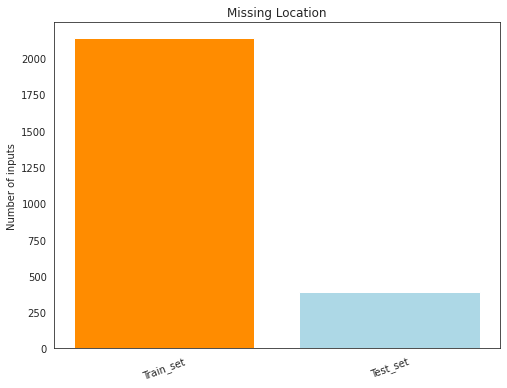

In [61]:
missingLocationTrain = df_train.location.isnull().sum(axis = 0)
missingLocatioTtest = df_test.location.isnull().sum(axis = 0)

#plot NaN proportion for Keyword
plt.rcParams['figure.figsize'] = (8, 6)
x = np.arange(2)
plt.bar(x,[missingLocationTrain, missingLocatioTtest], color=['darkorange','lightblue'])
plt.ylabel('Number of inputs')
plt.title('Missing Location')
plt.xticks(x, ('Train_set', 'Test_set'), rotation=20)
plt.show()

###Check the distribution: 

Identify the proportion between real disasters and not real disasters in the train set.

In [52]:
realDisaster = df_train[df_train['target'] == 1].shape[0]
notRealDisaster = df_train[df_train['target'] == 0].shape[0]

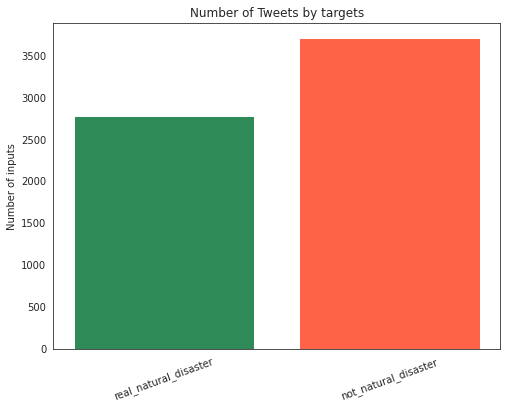

In [63]:
#Plot the result
plt.rcParams['figure.figsize'] = (8, 6)
x = np.arange(2)
plt.bar(x,[realDisaster, notRealDisaster], color=['seagreen','tomato'])
plt.ylabel('Number of inputs')
plt.title('Number of Tweets by targets')
plt.xticks(x, ('real_natural_disaster', 'not_natural_disaster'), rotation=20)
plt.show()

Identify which keywords are most related with a real disaster and which one are not. 

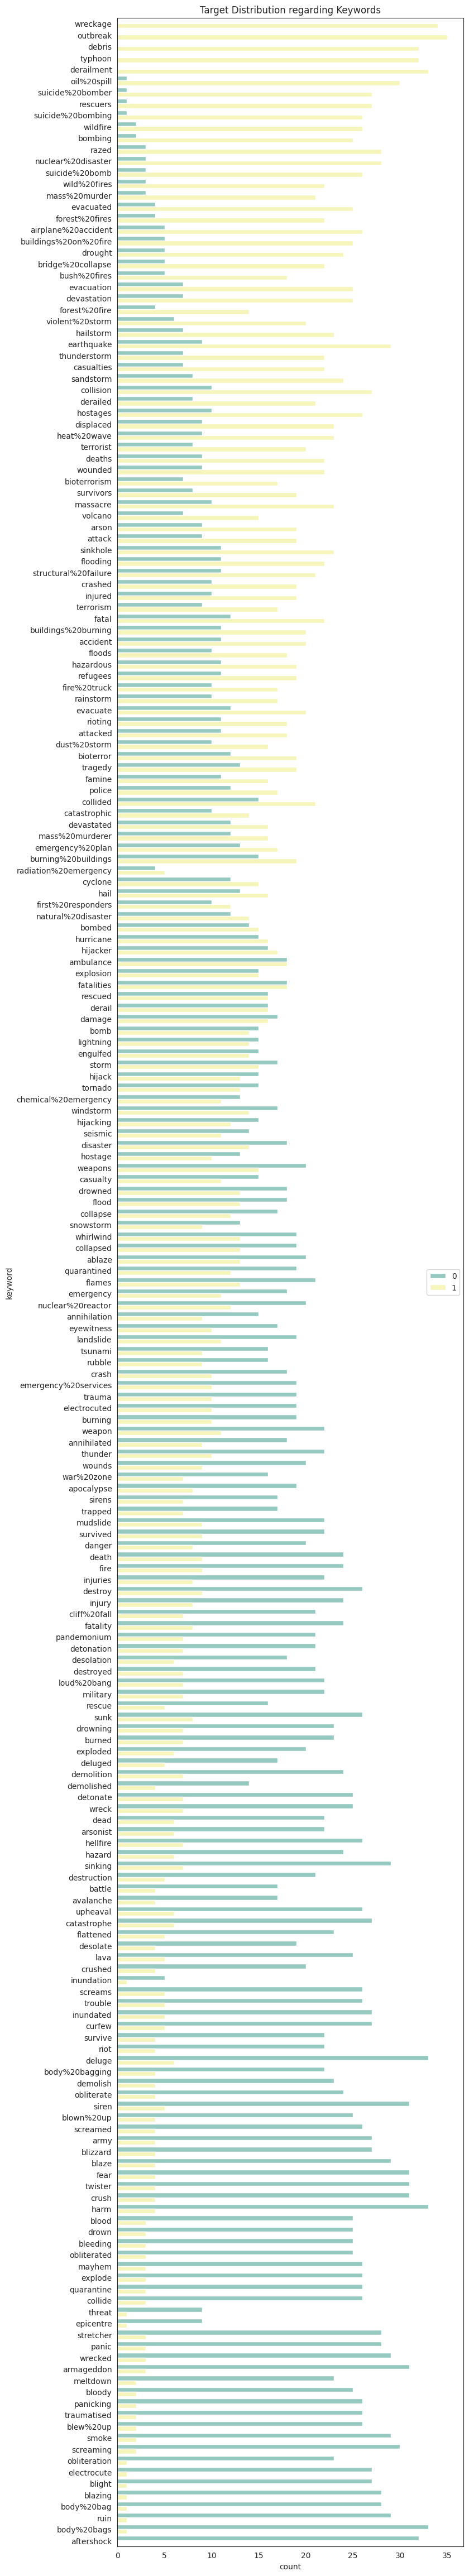

In [59]:
df_train['targetM'] = df_train.groupby('keyword')['target'].transform('mean')

figKey = plt.figure(figsize=(8, 60), dpi=100)

sns.countplot(y=df_train.sort_values(by='targetM', ascending=False)['keyword'],
              hue=df_train.sort_values(by='targetM', ascending=False)['target'],palette="Set3")

plt.legend()
plt.title('Target Distribution regarding Keywords')

plt.show()

df_train.drop(columns=['targetM'], inplace=True)

In [31]:
# Top 15 for real disaster

keywordRealTop = df_train['keyword'].loc[(df_train['target'] == 1)].value_counts()[0:15]

# Top 15 for not real disaster

keywordNotRealTop = df_train['keyword'].loc[(df_train['target'] == 0)].value_counts()[0:15]

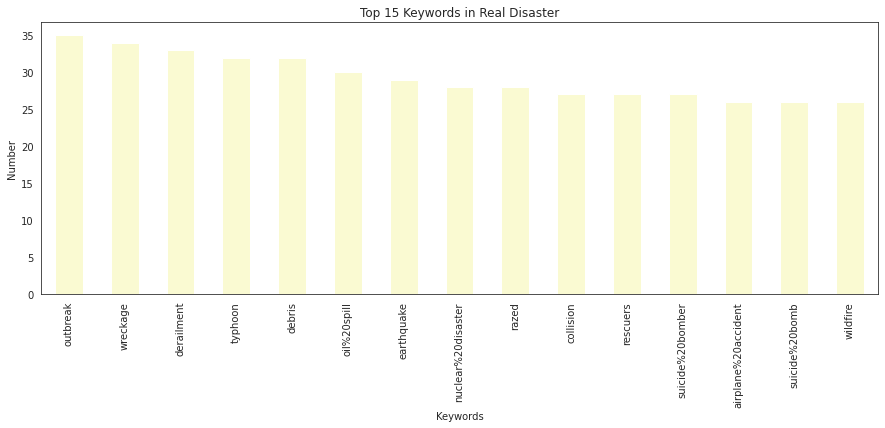

In [38]:
#PLot top 10 real
keywordRealTop.plot.bar(xlabel = 'Keywords', 
                          ylabel = 'Number', 
                          title = 'Top 15 Keywords in Real Disaster', 
                          figsize=(15, 5), 
                          color = 'lightgoldenrodyellow')

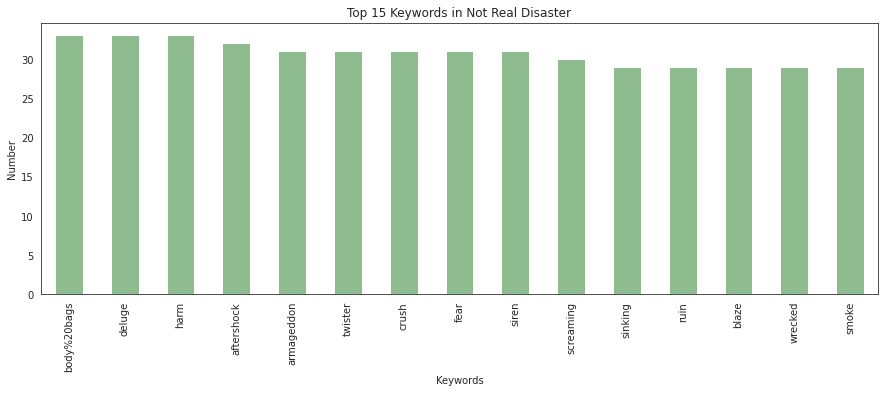

In [33]:
#PLot top 15 not real
keywordNotRealTop.plot.bar(xlabel = 'Keywords', 
                          ylabel = 'Number', 
                          title = 'Top 15 Keywords in Not Real Disaster',
                          figsize=(15, 5), 
                          color = 'darkseagreen')

### Analyzing the "location" feature 

In [35]:
# Top 15 for real disaster

locationRealTop = df_train['location'].loc[(df_train['target'] == 1)].value_counts()[0:15]

# Top 15 for not real disaster

locationNotRealTop = df_train['keyword'].loc[(df_train['target'] == 0)].value_counts()[0:10]

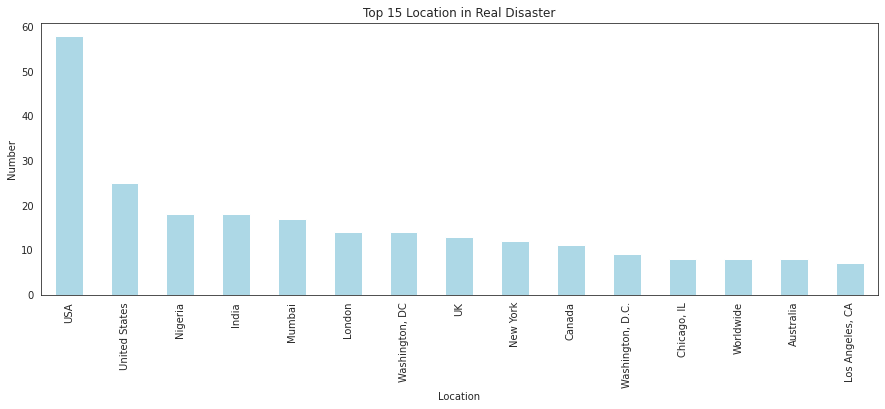

In [39]:
locationRealTop.plot.bar(xlabel = 'Location', 
                          ylabel = 'Number', 
                          title = 'Top 15 Location in Real Disaster', 
                          figsize=(15, 5), 
                          color = 'lightblue')

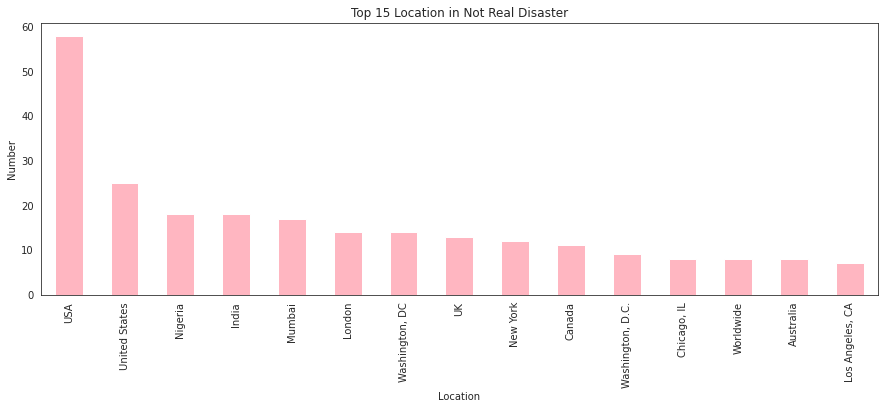

In [40]:
locationRealTop.plot.bar(xlabel = 'Location', 
                          ylabel = 'Number', 
                          title = 'Top 15 Location in Not Real Disaster', 
                          figsize=(15, 5), 
                          color = 'lightpink')

### EDA on "text" feature 

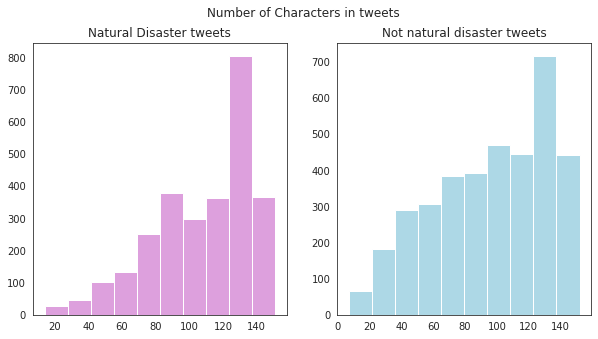

In [43]:
#number of characters in a Tweet 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

tweetRealTrain = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(tweetRealTrain,color='plum')
ax1.set_title('Natural Disaster tweets')

tweetNotRealTrain = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(tweetNotRealTrain,color='lightblue')
ax2.set_title('Not natural disaster tweets')
fig.suptitle('Number of Characters in tweets')
plt.show()

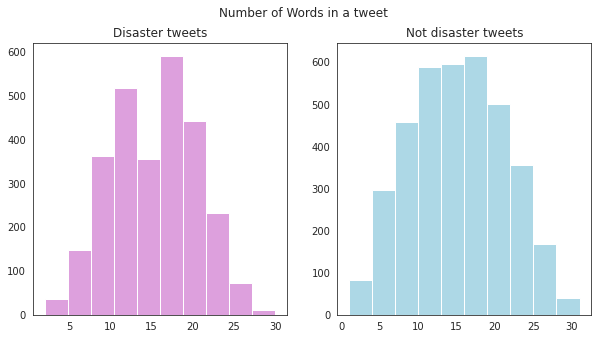

In [44]:
#number of words in a Tweet 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweetReal = df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweetReal,color='plum')
ax1.set_title('Disaster tweets')

tweetNotReal = df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweetNotReal,color='lightblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Number of Words in a tweet')

plt.show()

In [23]:
#Find most common words on Tweets 

import nltk
from nltk import tokenize

tokenSpace = tokenize.WhitespaceTokenizer()

def counter_common_words(text, columnText, quantity, title):
    allWords = ' '.join([text for text in text[columnText]])
    tokenizedPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenizedPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="Set3")
    ax.set(ylabel = "Count")
    plt.title(title)
    plt.xticks(rotation='horizontal')
    plt.show()

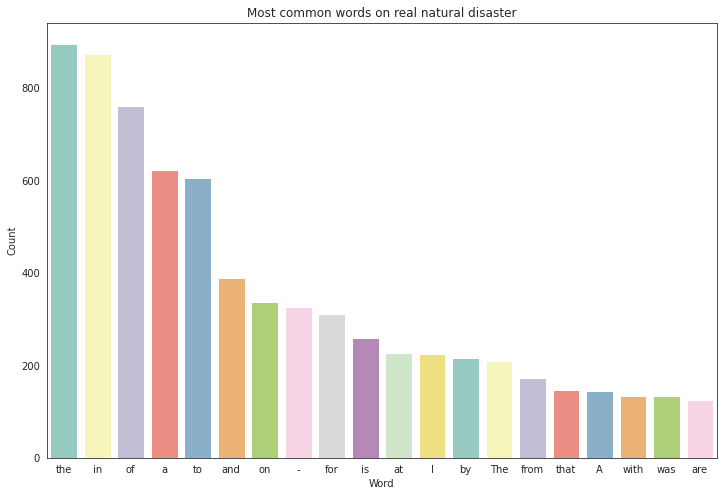

In [25]:
counter_common_words(df_train[df_train['target'] == 1], 'text', 20, 'Most common words on real natural disaster')

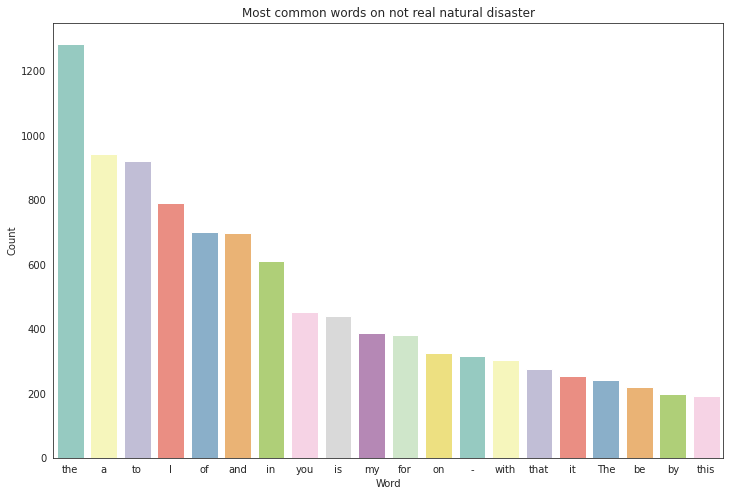

In [26]:
counter_common_words(df_train[df_train['target'] == 0], 'text', 20, 'Most common words on not real natural disaster')